# Stock Market Analysis

## About the dataset

The dataset can be found on: https://www.kaggle.com/datasets/mysarahmadbhat/stock-prices/data

S&P 500 Stock Prices
Historical stock market data for current S&P 500 companies, from 2014-2017. Each record represents a single day of trading, and includes the ticker name, volume, high, low, open and close prices.


## Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

In [3]:
# Loading the dataset 
stockdf = pd.read_csv("stock prices.csv")

In [4]:
# Let's look at the head of the dataset to get a sense of the data
stockdf.head(5)

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [5]:
# Now let's look at some of the structural attributes of the dataset

print (stockdf.shape)   # rows and columns
print (stockdf.columns) # column names
print (stockdf.dtypes)  # data types of each column

(497472, 7)
Index(['symbol', 'date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')
symbol     object
date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object


In [6]:
# Now let's conduct some basic analysis omn the description of the dataset
stockdf.describe()

,open,high,low,close,volume
count,497461.000000,497464.000000,497464.000000,497472.000000,4.974720e+05
mean,86.352275,87.132562,85.552467,86.369082,4.253611e+06
std,101.471228,102.312062,100.570957,101.472407,8.232139e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,41.690000,42.090000,41.280000,41.703750,1.080166e+06
50%,64.970000,65.560000,64.353700,64.980000,2.084896e+06
75%,98.410000,99.230000,97.580000,98.420000,4.271928e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


From this, we can interpret the following things: 
1. There are some null values present in the dataset. 
2. There are probably some outliers in the dataset. 

Let's combat these issues to avoid allow for an accurate prediction.

In [7]:
# Checking the null values
stockdf.isnull().sum()

symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64

Since the number of null values in the dataset are very less as compared to the total number of rows present, I think it is okay to drop these rows that contain null values. 

In [8]:
# Removing all null values from the dataset
stockdf.dropna(inplace=True)

In [9]:
# Verifying that all null values have been deleted
stockdf.isnull().sum()

symbol    0
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

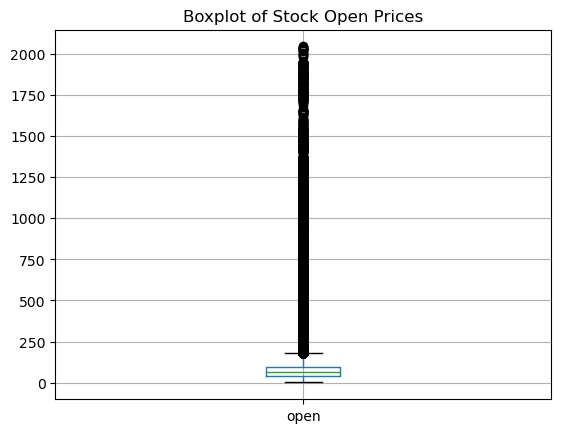

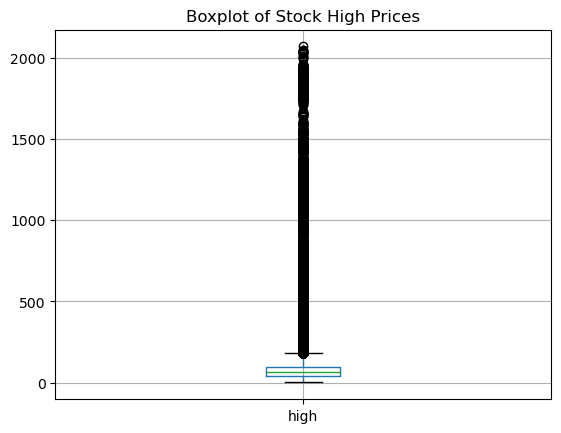

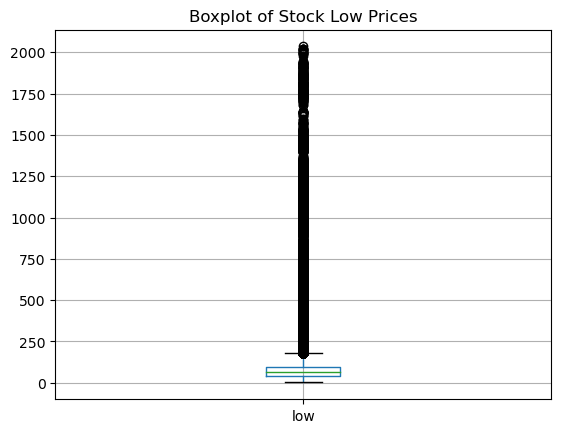

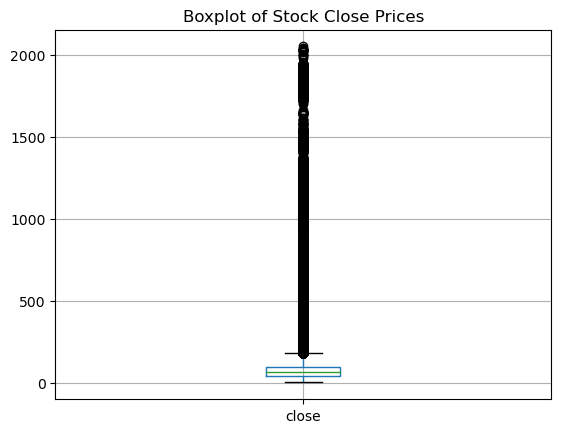

In [10]:
# To determine the outliers, we will have to create boxplots. 
# Boxplot for column "Open"
stockdf.boxplot('open')
plt.title('Boxplot of Stock Open Prices')
plt.show()
# Boxplot for column "high"
stockdf.boxplot('high')
plt.title('Boxplot of Stock High Prices')
plt.show()
# Boxplot for column "low"
stockdf.boxplot('low')
plt.title('Boxplot of Stock Low Prices')
plt.show()
# Boxplot for column "close"
stockdf.boxplot('close')
plt.title('Boxplot of Stock Close Prices')
plt.show()

We can see that there are many outliers in our dataset. This suggests that the data distribution is skewed. This could imply the presence of heavy-tailed distributions where extreme values are more common. Therefore, we won't remove these values in our analysis as they are important in this case. 

In [11]:
# Lets see which symbols are present in the dataset
list_of_companies = stockdf.symbol.unique()
list_of_companies

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK',
       'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY', 'BDX',
       'BEN', 'BF.B', 'BIIB', 'BK', 'BLK', 'BLL', 'BMY', 'BRK.B', 'BSX',
       'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA', 'CBG', 'CBOE', 'CBS',
       'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN', 'CF', 'CHD', 'CHK',
       'CHRW', 'CHTR', 'CINF', 'CI', 'CLX', 'CL', 'CMA', 'CMCSA', 'CME',
       'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COL', 'COO',
       'COP', 'COST', 'COTY', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTL',
       'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'C', 'DAL', 'D

In [12]:
# Lets see the count of symbols present in the dataset
count_of_symbols = stockdf['symbol'].nunique()
print(count_of_symbols)

505


In [13]:
# Lets see the count of symbols present in the dataset
print(len(list_of_companies))

505


/var/folders/3c/l6ytm9fn7tvdhs1v5xvjvnh40000gn/T/ipykernel_1503/2428894083.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(stockdf.corr(), cmap='RdBu')


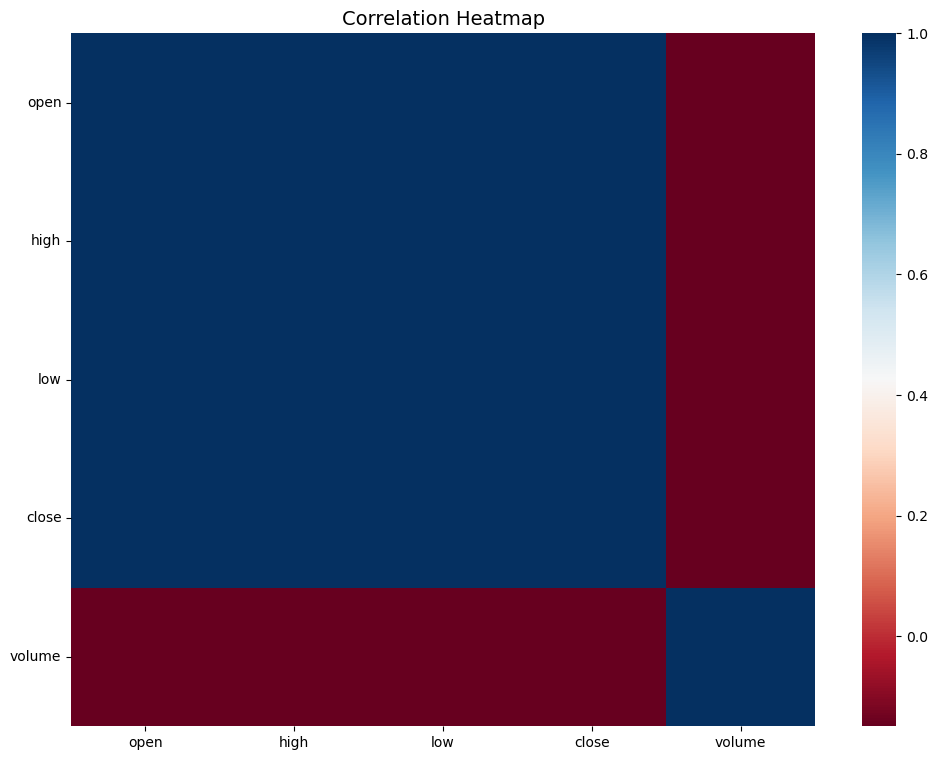

In [14]:
plt.figure(figsize=(12,9))
sns.heatmap(stockdf.corr(), cmap='RdBu')
plt.title('Correlation Heatmap', fontsize=14)
plt.yticks(rotation =0)
plt.show()

This map makes sense because in reality, the open, high, low, and close prices are pretty close to each other especialliy when we look at it from a daily standpoint.

In [15]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features and target variables
features = stockdf[['open', 'symbol']]
targets = stockdf[['high', 'low', 'close', 'volume']]

# Create a transformer for one-hot encoding the 'Symbol' column
preprocessor = ColumnTransformer(
    transformers=[
        ('symbol_encoder', OneHotEncoder(), ['symbol'])
    ],
    remainder='passthrough'
)

# Create a linear regression model
model = LinearRegression()

# Create a pipeline with preprocessing and the linear regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Set up cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for each target variable
for target in targets.columns:
    scores = cross_val_score(pipeline, features, targets[target], cv=kfold, scoring='neg_mean_squared_error')
    rmse_scores = (-scores)**0.5
    print(f'Mean RMSE for {target}: {rmse_scores.mean()}')

Mean RMSE for high: 1.0775277414328044
Mean RMSE for low: 1.17856560257534
Mean RMSE for close: 1.6015650531440275
Mean RMSE for volume: 4742619.65942083


## Approach

#### I aim to develop predictive models for the high, low, and close stock prices by utilizing historical data specific to each company. This involves creating separate models for different companies, where the historical stock data serves as the foundation for forecasting future high, low, and close values. The process entails data analysis, feature selection, model training, evaluation, and visualization, with the ultimate goal of accurately predicting stock price movements for individual companies based on their historical performance. 

In [16]:
stock_grouped_company = stockdf.groupby(['symbol']).count()
stock_grouped_company

,date,open,high,low,close,volume
symbol,,,,,,
A,1007,1007,1007,1007,1007,1007
AAL,1007,1007,1007,1007,1007,1007
AAP,1007,1007,1007,1007,1007,1007
AAPL,1007,1007,1007,1007,1007,1007
ABBV,1007,1007,1007,1007,1007,1007
...,...,...,...,...,...,...
XYL,1007,1007,1007,1007,1007,1007
YUM,1007,1007,1007,1007,1007,1007
ZBH,1007,1007,1007,1007,1007,1007


So there are 1007 data for each company

In [17]:
from sklearn.model_selection import KFold, cross_validate # for Cross-validation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [18]:
lr = LinearRegression()

In [19]:
Prediction_Accuracy_Data_Columns = ['Company Symbol', 'R^2 Error', 'MSE_Error']
Prediction_Columns = ['True Value', 'Prediction']

Prediction_Accuracy_High = pd.DataFrame(columns = Prediction_Accuracy_Data_Columns)
Prediction_Accuracy_Low = pd.DataFrame(columns = Prediction_Accuracy_Data_Columns)
Prediction_Accuracy_Close = pd.DataFrame(columns = Prediction_Accuracy_Data_Columns)
Prediction_Accuracy_Volume = pd.DataFrame(columns = Prediction_Accuracy_Data_Columns)

Prediction_High = pd.DataFrame(columns = Prediction_Columns)
Prediction_Low = pd.DataFrame(columns = Prediction_Columns)
Prediction_Close = pd.DataFrame(columns = Prediction_Columns)
Prediction_Volume = pd.DataFrame(columns = Prediction_Columns)

for company in list_of_companies:
    
    filtered_rows = stockdf[stockdf['symbol'] == company]
    
    X_features = filtered_rows[['open']]

    y_response1 = filtered_rows[['high']]
    y_response2 = filtered_rows[['low']]
    y_response3 = filtered_rows[['close']]
    y_response4 = filtered_rows[['volume']]
    
    
    cv_split = KFold(n_splits=10, shuffle=True, random_state=371) # random state ensures reproducable output across multiple function calls
    
    # PREDICTING HIGH
    
    r2_lr_list1 = []
    mse_lr_list1 = []
    
    for idx_train1, idx_test1 in cv_split.split(X_features, y_response1):
        X_train1 = X_features.iloc[idx_train1]
        X_test1 = X_features.iloc[idx_test1]
        y_train1 = y_response1.iloc[idx_train1]
        y_test1 = y_response1.iloc[idx_test1]
        #print(X_train1.shape, X_test1.shape)
    
        # linear regression
        m_lr1 = lr.fit(X_train1, y_train1)
        y_pred1 = m_lr1.predict(X_test1)
        
        prediction_row_high = pd.DataFrame({'True Value': y_test1.values.reshape(-1), 'Prediction': y_pred1.reshape(-1)})
        Prediction_High = pd.concat([Prediction_High,prediction_row_high], ignore_index=True)
    
        # R^2
        r2_lr1 = r2_score(y_true=y_test1, y_pred=y_pred1)
        r2_lr_list1.append(r2_lr1)
    
        # mean squared error
        mse_lr1 = mean_squared_error(y_true=y_test1, y_pred=y_pred1)
        mse_lr_list1.append(mse_lr1)

    #print("average R2 score of linear regression for predicting variable is open:", company, np.mean(r2_lr_list1))
    #print("average MSE linear regression for prdeicting variable is open:", company, np.mean(mse_lr_list1))
    
    new_row_high = pd.DataFrame({'Company Symbol': [company], 'R^2 Error': [np.mean(r2_lr_list1)], 'MSE_Error': [np.mean(mse_lr_list1)]})
    
    Prediction_Accuracy_High = pd.concat([Prediction_Accuracy_High, new_row_high], ignore_index=True)
    
    # PREDICTING LOW                                                                                                   
                                                                                                                                                                                                        
    r2_lr_list2 = []
    mse_lr_list2 = []
    
    for idx_train2, idx_test2 in cv_split.split(X_features, y_response2):
        X_train2 = X_features.iloc[idx_train2]
        X_test2 = X_features.iloc[idx_test2]
        y_train2 = y_response2.iloc[idx_train2]
        y_test2 = y_response2.iloc[idx_test2]
        #print(X_train2.shape, X_test2.shape)
    
        # linear regression
        m_lr2 = lr.fit(X_train2, y_train2)
        y_pred2 = m_lr2.predict(X_test2)
        
        prediction_row_low = pd.DataFrame({'True Value': y_test2.values.reshape(-1), 'Prediction': y_pred2.reshape(-1)})
        Prediction_Low = pd.concat([Prediction_Low,prediction_row_low], ignore_index=True)
    
        # R^2
        r2_lr2 = r2_score(y_true=y_test2, y_pred=y_pred2)
        r2_lr_list2.append(r2_lr2)
    
        # mean squared error
        mse_lr2 = mean_squared_error(y_true=y_test2, y_pred=y_pred2)
        mse_lr_list2.append(mse_lr2)

    #print("average R2 score of linear regression for predicting variable is high:", company, np.mean(r2_lr_list2))
    #print("average MSE linear regression for prdeicting variable is high:", company, np.mean(mse_lr_list2))
    
    new_row_low = pd.DataFrame({'Company Symbol': [company], 'R^2 Error': [np.mean(r2_lr_list2)], 'MSE_Error' : [np.mean(mse_lr_list2)]})
    
    Prediction_Accuracy_Low = pd.concat([Prediction_Accuracy_Low, new_row_low], ignore_index=True)                                                                                                   
                                                                                                       
    # PREDICTING CLOSE                                                                                                                                                                                                                                                                                                   
    
    r2_lr_list3 = []
    mse_lr_list3 = []                                                                                                   
                                                                                                       
    for idx_train3, idx_test3 in cv_split.split(X_features, y_response3):
        X_train3 = X_features.iloc[idx_train3] 
        X_test3 = X_features.iloc[idx_test3] 
        y_train3 = y_response3.iloc[idx_train3]   
        y_test3 = y_response3.iloc[idx_test3]
        #print(X_train2.shape, X_test2.shape) 
         
        #Linear Regression
        m_lr3 = lr.fit(X_train3, y_train3)
        y_pred3 = m_lr3.predict(X_test3)                                                                                              
        
        prediction_row_close = pd.DataFrame({'True Value': y_test3.values.reshape(-1), 'Prediction': y_pred3.reshape(-1)})
        Prediction_Close = pd.concat([Prediction_Close,prediction_row_close], ignore_index=True)
        
        r2_lr3 = r2_score(y_true=y_test3, y_pred=y_pred3) 
        r2_lr_list3.append(r2_lr3)
         
        mse_lr3 = mean_squared_error(y_true=y_test3, y_pred=y_pred3)
        mse_lr_list3.append(mse_lr3)
                                                                                                       
    #print("average R2 score of linear regression for predicting variable is close:", company, np.mean(r2_lr_list3))
    #print("average MSE linear regression for predicting variable is close:", company, np.mean(mse_lr_list3))                                                                                              
         
    new_row_close = pd.DataFrame({'Company Symbol': [company], 'R^2 Error': [np.mean(r2_lr_list3)], 'MSE_Error' : [np.mean(mse_lr_list3)]})
                                                                                                  
    Prediction_Accuracy_Close = pd.concat([Prediction_Accuracy_Close, new_row_close], ignore_index=True) 
                                                                                                       
    # PREDICTING VOLUME                                                                                                                                                                                                                                                                                                                                                                                                   
    
    r2_lr_list4 = []
    mse_lr_list4 = []                                                                                                   
                                                                                                       
    for idx_train4, idx_test4 in cv_split.split(X_features, y_response4):
        X_train4 = X_features.iloc[idx_train4] 
        X_test4 = X_features.iloc[idx_test4] 
        y_train4 = y_response4.iloc[idx_train4]   
        y_test4 = y_response4.iloc[idx_test4]
        #print(X_train2.shape, X_test2.shape) 
         
        #Linear Regression
        m_lr4 = lr.fit(X_train4, y_train4)
        y_pred4 = m_lr4.predict(X_test4)                                                                                              
                                                                                                       
        r2_lr4 = r2_score(y_true=y_test4, y_pred=y_pred4) 
        r2_lr_list4.append(r2_lr4)
        
        prediction_row_volume = pd.DataFrame({'True Value': y_test4.values.reshape(-1), 'Prediction': y_pred4.reshape(-1)})
        Prediction_Volume = pd.concat([Prediction_Volume,prediction_row_volume], ignore_index=True)
         
        mse_lr4 = mean_squared_error(y_true=y_test4, y_pred=y_pred4)
        mse_lr_list4.append(mse_lr4)
                                                                                                       
    #print("average R2 score of linear regression for predicting variable is close:", company, np.mean(r2_lr_list4))
    #print("average MSE linear regression for predicting variable is close:", company, np.mean(mse_lr_list4))                                                                                              
         
    new_row_volume = pd.DataFrame({'Company Symbol': [company], 'R^2 Error': [np.mean(r2_lr_list4)], 'MSE_Error' : [np.mean(mse_lr_list4)]})
                                                                                                  
    Prediction_Accuracy_Volume = pd.concat([Prediction_Accuracy_Volume, new_row_volume], ignore_index=True)                                                                                                     
                                                                                                       

/Users/poojasadarangani/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/poojasadarangani/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/poojasadarangani/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/poojasadarangani/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/poojasadarangani/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:91

In [20]:
Prediction_Accuracy_High

,Company Symbol,R^2 Error,MSE_Error
0,AAL,0.993025,0.250075
1,AAPL,0.998594,0.818961
2,AAP,0.996027,2.381137
3,ABBV,0.996076,0.410600
4,ABC,0.996408,0.584501
...,...,...,...
500,DXC,0.991716,0.447582
501,BHGE,0.963093,0.266399
502,BHF,0.964410,0.319929
503,DWDP,0.894080,0.153678


In [23]:
Prediction_High['error_rate'] = (Prediction_High['Prediction'] - Prediction_High['True Value'])*100/Prediction_High['True Value']
Prediction_High

,True Value,Prediction,error_rate
0,27.2000,27.296750,0.355699
1,35.0400,34.718125,-0.918593
2,39.2600,39.280527,0.052285
3,38.0800,38.603140,1.373792
4,37.9899,38.533409,1.430667
...,...,...,...
497456,86.3900,86.379426,-0.012240
497457,86.7900,87.437457,0.746004
497458,85.4700,85.638687,0.197364
497459,84.4800,84.488567,0.010140


In [24]:
Prediction_High['error_rate'].mean()

0.008865234360564989

In [237]:
mse_final_high = mean_squared_error(y_true=Prediction_High['True Value'], y_pred=Prediction_High['Prediction'])
mse_final_high

1.1521447968162186

In [238]:
r2_score_final_high = r2_score(y_true=Prediction_High['True Value'], y_pred=Prediction_High['Prediction'])
r2_score_final_high

0.9998899343251234

I manually changed the value of k to select the one resulting in least average error rate for 'close'

1. k = 3 --> mse = 1.152664121778224 | r2_score = 0.9998898847134318
3. k = 5 --> mse = 1.151756521020337 | r2_score = 0.9998899714175424
4. k = 10 --> mse = 1.1521447968162186 | r2_score = 0.9998899343251234


In [239]:
Prediction_Accuracy_Low

,Company Symbol,R^2 Error,MSE_Error
0,AAL,0.990956,0.324794
1,AAPL,0.998346,0.986221
2,AAP,0.996152,2.187031
3,ABBV,0.994607,0.529270
4,ABC,0.996535,0.551091
...,...,...,...
500,DXC,0.993913,0.333929
501,BHGE,0.966788,0.209280
502,BHF,0.938649,0.604836
503,DWDP,0.910298,0.156190


In [25]:
Prediction_Low['error_rate'] = (Prediction_Low['Prediction'] - Prediction_Low['True Value'])*100/Prediction_Low['True Value']

In [26]:
Prediction_Low

,True Value,Prediction,error_rate
0,26.60,26.190766,-1.538473
1,34.06,33.549840,-1.497828
2,37.95,38.073941,0.326591
3,37.23,37.402241,0.462639
4,35.75,37.333095,4.428238
...,...,...,...
497456,85.30,84.550888,-0.878208
497457,84.88,85.024993,0.170821
497458,84.61,84.222782,-0.457650
497459,83.42,83.809845,0.467327


In [27]:
Prediction_Low['error_rate'].mean()

0.01016062711978186

In [240]:
mse_final_low = mean_squared_error(y_true=Prediction_Low['True Value'], y_pred=Prediction_Low['Prediction'])
mse_final_low

1.3750677704268126

In [241]:
r2_score_final_low = r2_score(y_true=Prediction_Low['True Value'], y_pred=Prediction_Low['Prediction'])
r2_score_final_low

0.9998640505534618

I manually changed the value of k to select the one resulting in least average error rate for 'low'

1. k = 3 --> mse = 1.3760990694026538 | r2_score = 0.99986394859156
3. k = 5 --> mse = 1.376262989167583 | r2_score = 0.9998639323852305
4. k = 10 --> mse = 1.3750677704268126 | r2_score = 0.9998640505534618


In [242]:
Prediction_Accuracy_Close

,Company Symbol,R^2 Error,MSE_Error
0,AAL,0.982489,0.630550
1,AAPL,0.997060,1.738517
2,AAP,0.993158,4.052997
3,ABBV,0.992371,0.795788
4,ABC,0.994311,0.910759
...,...,...,...
500,DXC,0.986658,0.711985
501,BHGE,0.910293,0.614690
502,BHF,0.908146,0.919902
503,DWDP,0.773569,0.360596


In [28]:
Prediction_Close['error_rate'] = (Prediction_Close['Prediction'] - Prediction_Close['True Value'])*100/Prediction_Close['True Value']

In [29]:
Prediction_Close

,True Value,Prediction,error_rate
0,27.0300,26.865779,-0.607550
1,35.0250,34.200254,-2.354736
2,38.0800,38.709232,1.652396
3,37.5599,38.039777,1.277631
4,36.7400,37.970863,3.350197
...,...,...,...
497456,85.8700,85.122492,-0.870512
497457,84.9800,85.853103,1.027422
497458,84.7300,84.756956,0.031814
497459,84.4000,84.005322,-0.467628


In [30]:
Prediction_Close['error_rate'].mean()

0.01812111726559941

In [31]:
mse_final_close = mean_squared_error(y_true=Prediction_Close['True Value'], y_pred=Prediction_Close['Prediction'])
mse_final_close

2.5665967905446254

In [32]:
r2_score_final_close = r2_score(y_true=Prediction_Close['True Value'], y_pred=Prediction_Close['Prediction'])
r2_score_final_close

0.9997507298814866

I manually changed the value of k to select the one resulting in least average error rate for 'close'
1. k = 3 --> mse = 2.5666652594036323 | r2_score = 0.9997507232317313
2. k = 5 --> mse = 2.5673135121076682 | r2_score = 0.9997506602728634
3. k = 10 --> mse = 2.5665967905446254 | r2_score = 0.9997507298814866

In [33]:
#Prediction_Accuracy_Volume

In [34]:
#Prediction_Volume

In [35]:
#mse_final_volume = mean_squared_error(y_true=Prediction_Volume['True Value'], y_pred=Prediction_Volume['Prediction'])
#mse_final_volume

In [36]:
#r2_score_final_volume = r2_score(y_true=Prediction_Volume['True Value'], y_pred=Prediction_Volume['Prediction'])
#r2_score_final_volume

I manually changed the value of k to select the one resulting in least average error rate for 'volume'
1. k = 3 --> mse = 19806453081962.906 | r2_score = 0.7077364425474144
2. k = 5 --> mse = 19787625639695.22 | r2_score = 0.7080142598442378
3. k = 10 --> mse = 19764538557773.848 | r2_score = 0.7083549322839531
